 A simple implementation of the above diagram can be created in Python. Embedding a sequence requires a tokenizer, a vocabulary of words and their indices, and a three-dimensional embedding for each word in the vocabulary. A tokenizer splits a sequence into its tokens, which are lowercase words in this example. The simple function below removes punctuation from the sequence, splits it into its tokens, and lowercases them.

In [62]:
# importing required libraries
import math
import copy
import numpy as np

# torch packages
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import Tensor

# visualization packages
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

example = "Hello! This is an example of a paragraph that has been split into its basic components. I wonder what will come next! Any guesses?"

def tokenize(sequence):
  # remove punctuation
  for punc in ["!", ".", "?"]:
    sequence = sequence.replace(punc, "")

  # split the sequence on spaces and lowercase each token
  return [token.lower() for token in sequence.split(" ")]

tokenize(example)

['hello',
 'this',
 'is',
 'an',
 'example',
 'of',
 'a',
 'paragraph',
 'that',
 'has',
 'been',
 'split',
 'into',
 'its',
 'basic',
 'components',
 'i',
 'wonder',
 'what',
 'will',
 'come',
 'next',
 'any',
 'guesses']

With the tokenizer created, the vocabulary can be created for the example. The vocabulary contains the unique list of words that make up the data. While there are not duplicates in the example, they should still be removed. A simple example would be the following sentence: “i am cool because i am short.” The vocabulary would be “i, am, cool, because, short”. These words would then be placed in alphabetical order: “am, because, cool, i, short”. Finally, they would each be assigned an integer: “am: 0, because: 1, cool: 2, i: 3, short: 4”. This process is implemented in the function below.



In [63]:
def build_vocab(data):
  # tokenize the data and remove duplicates
  vocab = list(set(tokenize(data)))

  # sort the vocabulary
  vocab.sort()

  # assign an integer to each word
  stoi = {word:i for i, word in enumerate(vocab)}

  return stoi

# build the vocab
stoi = build_vocab(example)

stoi

{'a': 0,
 'an': 1,
 'any': 2,
 'basic': 3,
 'been': 4,
 'come': 5,
 'components': 6,
 'example': 7,
 'guesses': 8,
 'has': 9,
 'hello': 10,
 'i': 11,
 'into': 12,
 'is': 13,
 'its': 14,
 'next': 15,
 'of': 16,
 'paragraph': 17,
 'split': 18,
 'that': 19,
 'this': 20,
 'what': 21,
 'will': 22,
 'wonder': 23}

This vocabulary can now be used to convert any sequence of tokens into its integer representation.



In [64]:
sequence = [stoi[word] for word in tokenize("I wonder what will come next!")]
sequence

[11, 23, 21, 22, 5, 15]

The next step is to create the embedding layer, which is nothing more than a matrix of random values with a size of (vocab_size, d_model). These values can be generated using torch.rand.



In [65]:
# vocab size
vocab_size=len(stoi)

# embedding dimensions
d_model = 3

# generate the embedding layer
embeddings = torch.rand(vocab_size, d_model)
embeddings

tensor([[0.96, 0.66, 0.06],
        [0.86, 0.97, 0.60],
        [0.90, 0.12, 0.87],
        [0.45, 0.39, 0.78],
        [0.48, 0.50, 0.67],
        [0.57, 0.31, 0.57],
        [0.76, 0.12, 0.74],
        [0.45, 0.22, 0.11],
        [0.70, 0.61, 0.25],
        [0.51, 0.59, 0.40],
        [0.40, 0.11, 0.73],
        [0.70, 0.20, 0.83],
        [0.05, 0.35, 0.57],
        [0.02, 0.43, 0.23],
        [0.72, 0.82, 0.75],
        [0.34, 0.47, 0.31],
        [0.50, 0.39, 0.94],
        [0.61, 0.68, 0.31],
        [0.33, 0.09, 0.28],
        [0.44, 0.63, 0.91],
        [0.42, 0.48, 0.78],
        [0.93, 0.72, 0.41],
        [0.17, 0.28, 0.50],
        [0.74, 0.88, 0.06]])

With the embeddings created, the indexed sequence can be used to select the appropriate embedding for each token. The original sequence has a shape of (6, ) and values of [11, 23, 21, 22, 5, 15].



In [66]:
# embed the sequence
embedded_sequence = embeddings[sequence]

embedded_sequence

tensor([[0.70, 0.20, 0.83],
        [0.74, 0.88, 0.06],
        [0.93, 0.72, 0.41],
        [0.17, 0.28, 0.50],
        [0.57, 0.31, 0.57],
        [0.34, 0.47, 0.31]])

Now, each of the six tokens is replaced by a 3-element vector; the new shape is (6, 3).

Since each of these tokens has three components, they can be mapped in three dimensions. While this plot shows an untrained embedding matrix, a trained one would map similar words near each other like the aforementioned book example.

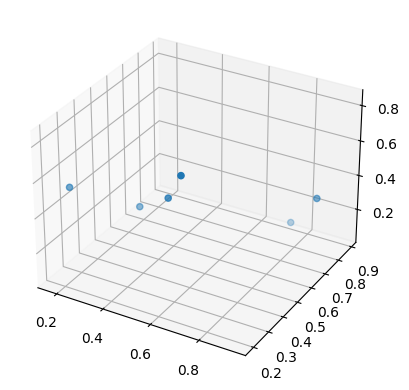

In [67]:
x, y, z = embedded_sequence[:,0], embedded_sequence[:,1], embedded_sequence[:,2]
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z)

# Embeddings Using the PyTorch Module

Since PyTorch will be used to implement the transformer, the nn.Embedding module can be analyzed. PyTorch defines it as:

A simple lookup table that stores embeddings of a fixed dictionary and size.

This module is often used to store word embeddings and retrieve them using indices. The input to the module is a list of indices, and the output is the corresponding word embeddings.

This describes exactly what was done in the previous example when using indices instead of one-hot vectors.

At a minimum, nn.Embedding requires the vocab_size and the embedding dimension, which will continue to be notated as d_model moving forward. As a reminder, this is short for the dimension of the model.

**The code below creates an embedding matrix with a shape of (24, 3).**

In [68]:
# vocab size
vocab_size = len(stoi) # 24

# embedding dimensions
d_model = 3

# create the embeddings
lut = nn.Embedding(vocab_size, d_model) # look-up table (lut)

# view the embeddings
lut.state_dict()['weight']

tensor([[-0.68, -0.11,  0.81],
        [ 1.88,  0.08,  0.95],
        [ 0.43, -0.15, -1.14],
        [-0.48,  1.86, -0.22],
        [-0.52, -0.12,  1.19],
        [-0.66, -0.83, -0.94],
        [ 0.20, -0.51,  0.58],
        [-0.70, -1.70, -1.78],
        [-0.07, -0.71, -1.88],
        [ 0.08,  0.99,  1.59],
        [ 0.01,  1.61,  0.14],
        [-0.88, -1.97,  0.54],
        [-0.81,  0.14, -0.85],
        [ 0.58,  0.62, -0.65],
        [ 0.57, -0.03,  0.47],
        [ 0.24,  1.32,  0.23],
        [-0.50, -0.22,  0.30],
        [-0.33,  0.39,  1.17],
        [-1.89, -0.49,  2.64],
        [-0.42, -0.50, -0.09],
        [ 0.43, -0.73,  0.36],
        [-0.27,  0.02,  0.11],
        [-0.73,  1.46, -0.10],
        [-0.65,  1.15, -2.04]])

If the same sequence of indices as before, [11, 23, 21, 22, 5, 15], is passed to it, the output will be a (6, 3) matrix, where each token is represented by its 3-dimensional embedding vector. The indices must be in the form of a tensor with a data type of either integer or long.

In [69]:
indecies = torch.Tensor(sequence).long()

embeddings = lut(indecies)
embeddings

tensor([[-0.88, -1.97,  0.54],
        [-0.65,  1.15, -2.04],
        [-0.27,  0.02,  0.11],
        [-0.73,  1.46, -0.10],
        [-0.66, -0.83, -0.94],
        [ 0.24,  1.32,  0.23]], grad_fn=<EmbeddingBackward0>)

This implementation is going to build directly off the one from the previous post. The output below embeds three sequences with a d_model of 4.



In [70]:
# list of sequences (3, )
sequences = ["I wonder what will come next!",
             "This is a basic example paragraph.",
             "Hello what is a basic split?"]

In [71]:
# set the output to 2 decimal places without scientific notation
torch.set_printoptions(precision=2, sci_mode=False)

# tokenize the sequences
tokenized_sequences = [tokenize(seq) for seq in sequences]

# index the sequences
indexed_sequences = [[stoi[word] for word in seq] for seq in tokenized_sequences]

# convert the sequences to a tensor
tensor_sequences = torch.tensor(indexed_sequences).long()

lut(tensor_sequences)
# vocab size
vocab_size = len(stoi)

# embedding dimensions
d_model = 4

# create the embeddings
lut = nn.Embedding(vocab_size, d_model) # look-up table (lut)

# embed the sequence
embeddings = lut(tensor_sequences)

embeddings

tensor([[[ 1.58,  2.36,  0.81,  0.56],
         [ 1.10, -0.02,  1.05,  0.98],
         [-0.47, -1.32, -0.20,  0.26],
         [-0.72,  2.03, -1.70, -1.43],
         [ 1.16,  0.23, -0.29,  0.74],
         [ 0.95,  0.48,  0.98,  1.81]],

        [[-0.74,  0.55, -0.37,  0.58],
         [ 0.23, -0.13, -0.12, -1.62],
         [-2.27,  1.18,  2.91, -0.46],
         [ 0.22, -1.87, -0.86, -1.61],
         [ 0.40,  0.13, -1.47, -1.02],
         [ 0.71, -2.86,  0.57, -1.03]],

        [[ 0.03, -0.99,  0.44,  1.60],
         [-0.47, -1.32, -0.20,  0.26],
         [ 0.23, -0.13, -0.12, -1.62],
         [-2.27,  1.18,  2.91, -0.46],
         [ 0.22, -1.87, -0.86, -1.61],
         [ 0.40, -0.26,  0.34, -1.46]]], grad_fn=<EmbeddingBackward0>)

The next step is to encode the position of each word in each sequence via positional encodings. The function below follows the definition above. The only change worth mentioning is that L is notated as max_length. It is often set to an extremely large value in the thousands to ensure that almost every sequence can be encoded appropriately. This ensures that the same positional encoding matrix can be used for sequences of varying lengths. It can be sliced to the appropriate length before addition.



In [72]:
def gen_pe(max_length, d_model, n):

  # generate an empty matrix for the positional encodings (pe)
  pe = np.zeros(max_length*d_model).reshape(max_length, d_model)

  # for each position
  for k in np.arange(max_length):

    # for each dimension
    for i in np.arange(d_model//2):

      # calculate the internal value for sin and cos
      theta = k / (n ** ((2*i)/d_model))

      # even dims: sin
      pe[k, 2*i] = math.sin(theta)

      # odd dims: cos
      pe[k, 2*i+1] = math.cos(theta)

  return pe

# maximum sequence length
max_length = 10
n = 100
encodings = gen_pe(max_length, d_model, n)

As mentioned, the max_length is set to 10. While this is more than required, it ensures that if another sequence were to have a length of 7, 8, 9, or 10, the same positional encoding matrix could be used. It would just need to be sliced to the appropriate length. Below, the embeddings have a seq_length of six, so the encodings can be sliced accordingly.



In [73]:
# select the first six tokens
seq_length = embeddings.shape[1]
encodings[:seq_length]

array([[ 0.        ,  1.        ,  0.        ,  1.        ],
       [ 0.84147098,  0.54030231,  0.09983342,  0.99500417],
       [ 0.90929743, -0.41614684,  0.19866933,  0.98006658],
       [ 0.14112001, -0.9899925 ,  0.29552021,  0.95533649],
       [-0.7568025 , -0.65364362,  0.38941834,  0.92106099],
       [-0.95892427,  0.28366219,  0.47942554,  0.87758256]])

This output is what would be passed to the next layer of the model, which is the Multi-head Attention that will be covered in the next article.

However, this basic implementation is not efficient due to its use of nested loops, especially if larger values of d_model and max_length are used. Instead, a more PyTorch-centric approach can be used.

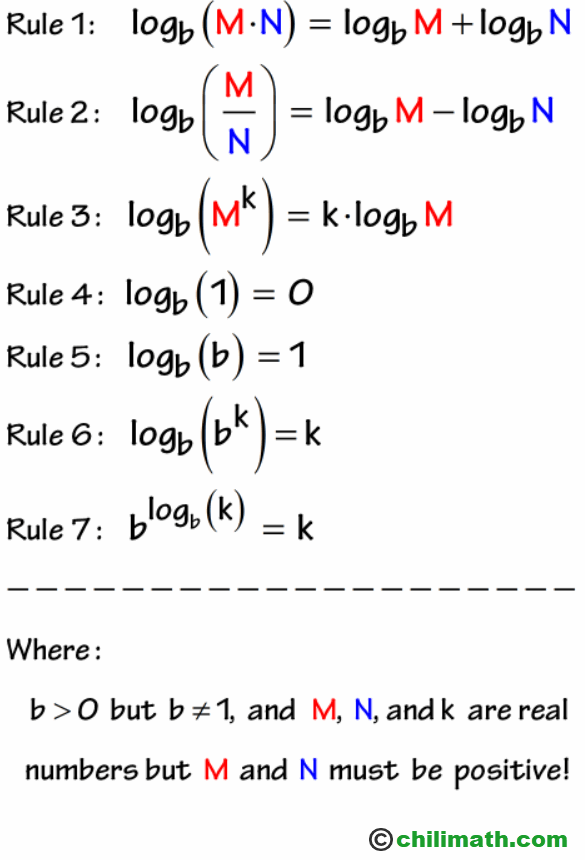

In [74]:
max_length = 10
d_model = 4
n = 100

def gen_pe(max_length, d_model, n):
  # calculate the div_term
  div_term = torch.exp(torch.arange(0, d_model, 2) * -(math.log(n) / d_model))

  # generate the positions into a column matrix
  k = torch.arange(0, max_length).unsqueeze(1)

  # generate an empty tensor
  pe = torch.zeros(max_length, d_model)

  # set the even values
  pe[:, 0::2] = torch.sin(k * div_term)

  # set the odd values
  pe[:, 1::2] = torch.cos(k * div_term)

  # add a dimension
  pe = pe.unsqueeze(0)

  # the output has a shape of (1, max_length, d_model)
  return pe

gen_pe(max_length, d_model, n)

tensor([[[ 0.00,  1.00,  0.00,  1.00],
         [ 0.84,  0.54,  0.10,  1.00],
         [ 0.91, -0.42,  0.20,  0.98],
         [ 0.14, -0.99,  0.30,  0.96],
         [-0.76, -0.65,  0.39,  0.92],
         [-0.96,  0.28,  0.48,  0.88],
         [-0.28,  0.96,  0.56,  0.83],
         [ 0.66,  0.75,  0.64,  0.76],
         [ 0.99, -0.15,  0.72,  0.70],
         [ 0.41, -0.91,  0.78,  0.62]]])

# Background
In transformers models, attention provides context for each sequence. This helps the model understand how different words relate to each other to create meaningful sentences. According to Wikipedia’s description, “the attention layer can access all previous states and weigh them according to a learned measure of relevance, providing relevant information about far-away tokens.”


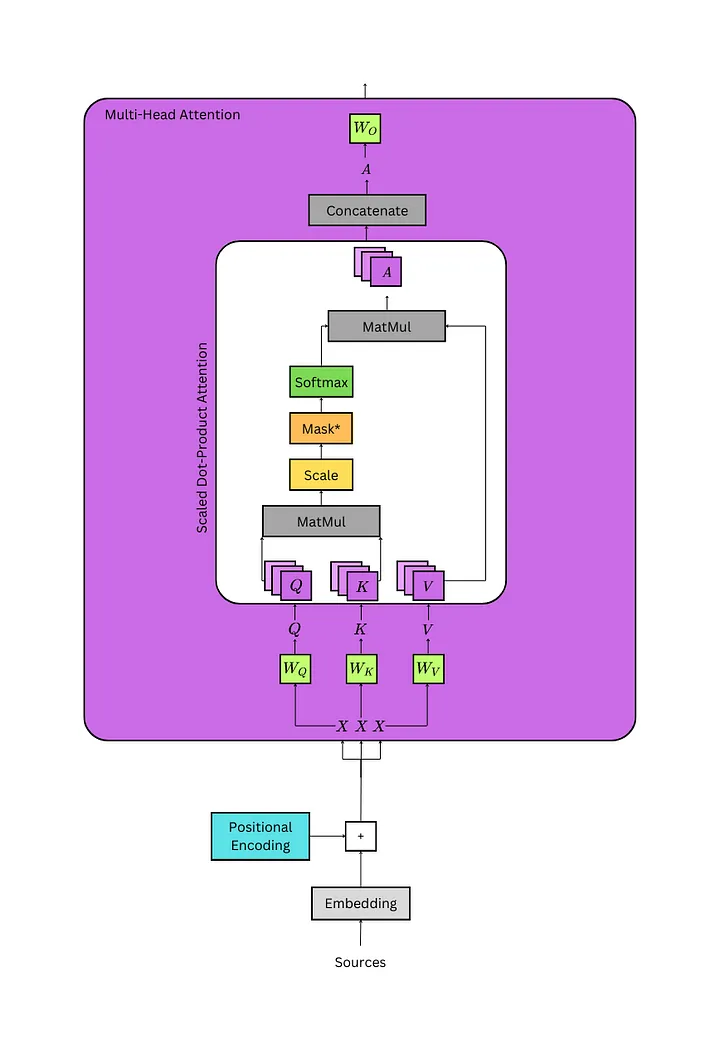

In [75]:
# importing required libraries
import math
import copy
import numpy as np

# torch packages
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import Tensor


class Embeddings(nn.Module):
  def __init__(self, vocab_size: int, d_model: int):
    """
    Args:
      vocab_size:     size of vocabulary
      d_model:        dimension of embeddings
    """
    # inherit from nn.Module
    super().__init__()

    # embedding look-up table (lut)
    self.lut = nn.Embedding(vocab_size, d_model)

    # dimension of embeddings
    self.d_model = d_model

  def forward(self, x: Tensor):
    """
    Args:
      x:        input Tensor (batch_size, seq_length)

    Returns:
                embedding vector
    """
    # embeddings by constant sqrt(d_model)
    return self.lut(x) * math.sqrt(self.d_model)


In [76]:
# importing required libraries
import math
import copy
import numpy as np

# torch packages
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import Tensor

class PositionalEncoding(nn.Module):
  def __init__(self, d_model: int, dropout: float = 0.1, max_length: int = 5000):
    """
    Args:
      d_model:      dimension of embeddings
      dropout:      randomly zeroes-out some of the input
      max_length:   max sequence length
    """
    # inherit from Module
    super().__init__()

    # initialize dropout
    self.dropout = nn.Dropout(p=dropout)

    # create tensor of 0s
    pe = torch.zeros(max_length, d_model)

    # create position column
    k = torch.arange(0, max_length).unsqueeze(1)

    # calc divisor for positional encoding
    div_term = torch.exp(
            torch.arange(0, d_model, 2) * -(math.log(10000.0) / d_model)
    )

    # calc sine on even indices
    pe[:, 0::2] = torch.sin(k * div_term)

    # calc cosine on odd indices
    pe[:, 1::2] = torch.cos(k * div_term)

    # add dimension
    pe = pe.unsqueeze(0)

    # buffers are saved in state_dict but not trained by the optimizer
    self.register_buffer("pe", pe)

  def forward(self, x: Tensor):
    """
    Args:
      x:        embeddings (batch_size, seq_length, d_model)

    Returns:
                embeddings + positional encodings (batch_size, seq_length, d_model)
    """
    # add positional encoding to the embeddings
    x = x + self.pe[:, : x.size(1)].requires_grad_(False)

    # perform dropout
    return self.dropout(x)


In [77]:
# convert the sequences to integers
sequences = ["I wonder what will come next!",
             "This is a basic example paragraph.",
             "Hello what is a basic split?"]

# tokenize the sequences
tokenized_sequences = [tokenize(seq) for seq in sequences]

# index the sequences
indexed_sequences = [[stoi[word] for word in seq] for seq in tokenized_sequences]

# convert the sequences to a tensor
tensor_sequences = torch.tensor(indexed_sequences).long()

# vocab size
vocab_size = len(stoi)

# embedding dimensions
d_model = 8

# create the embeddings
lut = Embeddings(vocab_size, d_model) # look-up table (lut)

# create the positional encodings
pe = PositionalEncoding(d_model=d_model, dropout=0.1, max_length=10)

# embed the sequence
embeddings = lut(tensor_sequences)

# positionally encode the sequences
X = pe(embeddings)

At this point, the embedded sequences, X, have a shape of (3, 6, 8). There are 3 sequences of 6 tokens with an 8 dimensional embedding.

The linear layers for Wq, Wk, and Wv can be created using nn.Linear(d_model, d_model). This creates an (8,8) matrix that will be broadcast during multiplication across each sequence.



In [78]:
Wq = nn.Linear(d_model, d_model)          # query weights (8,8)
Wk = nn.Linear(d_model, d_model)          # key weights   (8,8)
Wv = nn.Linear(d_model, d_model)          # value weights (8,8)

Wq.state_dict()['weight']

tensor([[-0.21,  0.05,  0.02, -0.15, -0.05,  0.29,  0.32, -0.28],
        [-0.32,  0.12, -0.01, -0.08,  0.29,  0.27, -0.31, -0.22],
        [ 0.22, -0.20,  0.08, -0.30,  0.19, -0.08, -0.11, -0.27],
        [-0.04,  0.31, -0.09, -0.08, -0.14,  0.31,  0.02, -0.34],
        [-0.32, -0.02, -0.34, -0.27, -0.29, -0.19,  0.34,  0.15],
        [-0.23,  0.23, -0.29,  0.07,  0.35,  0.16,  0.05,  0.08],
        [-0.22, -0.35, -0.15, -0.12, -0.23, -0.04,  0.09, -0.21],
        [-0.08, -0.29, -0.04,  0.16, -0.29,  0.26,  0.15,  0.29]])

The weights for Wq can be seen above. Wk and Wv have the same shapes with different weights. When X is passed through each linear layer, it retains its shape, but now Q, K, and V have been transformed by the weights into unique tensors.

In [79]:
Q = Wq(X) # (3,6,8)x(broadcast 8,8) = (3,6,8)
K = Wk(X) # (3,6,8)x(broadcast 8,8) = (3,6,8)
V = Wv(X) # (3,6,8)x(broadcast 8,8) = (3,6,8)

Q

tensor([[[ 0.43,  2.00,  0.92,  0.61, -2.51,  1.20, -1.33, -0.12],
         [-0.76,  2.17,  1.60, -2.89, -2.09,  2.05, -0.89, -1.22],
         [-2.03, -3.99,  0.01, -2.23,  0.31, -1.60, -0.89,  1.35],
         [ 4.01,  1.04, -0.32,  0.97,  3.47,  0.91,  2.99,  1.66],
         [-1.38, -0.08, -0.97, -1.05, -2.22, -0.18, -0.56,  0.28],
         [ 0.84,  0.85, -0.69,  1.19,  0.36,  0.78, -0.03, -0.28]],

        [[-1.47,  1.69, -0.94,  0.16, -4.89,  0.79, -1.71,  0.68],
         [-0.31,  0.84, -2.85, -0.06,  0.19,  3.81, -2.61, -0.85],
         [-1.71, -2.58, -5.56, -1.22,  3.22,  1.24, -0.41,  4.67],
         [-1.40,  4.12, -1.91,  0.77, -1.21,  1.47, -0.37, -0.88],
         [-3.19,  1.37, -0.44, -0.36, -1.27,  0.82, -1.02, -0.69],
         [ 0.72,  1.89, -3.84,  1.49, -1.57,  2.09, -2.54,  1.28]],

        [[ 0.68,  1.83, -0.23,  2.24, -0.55, -0.29,  0.06, -0.81],
         [-1.97, -3.85, -0.24, -1.89,  0.35, -1.31, -1.23,  1.06],
         [-0.39,  0.69, -2.60, -0.41,  0.16,  3.52, -2.27,

Q, K, and V all have this shape. Like before, each matrix is a sequence, and each row is a token represented by embeddings.

Splitting Q, K, and V Into Their Heads

With the Q, K, and V tensors created, they can now be split into their respective heads by changing the view of d_model to (n_heads, d_key). n_heads can be an arbitrary number, but it is common to do 8, 10, or 12 when working with larger embeddings. Remember that d_key = (d_model / n_heads).


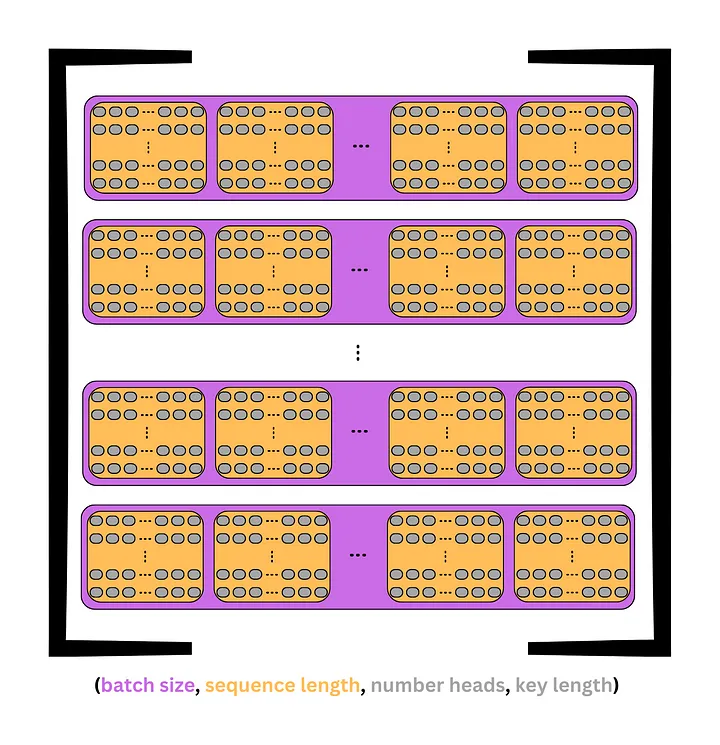

In the previous image, each token contained d_model embeddings in a single dimension. Now, this dimension is split into rows and columns to create a matrix; each row is a head containing keys. This can be seen in the image above.

The shape of each tensor becomes:

**(batch_size, seq_length, d_model) → (batch_size, seq_length, n_heads, d_key)**

Assuming four heads were chosen for the example, the (3, 6, 8) tensors would be split into (3, 6, 4, 2) tensors, where there are 3 sequences, 6 tokens in each sequence, 4 heads in each token, and 2 elements in each head.

This can be done with view, which can be used to add and set the size of each dimension. Since the batch size, or number of sequences, is the same for each example, the batch size can be set. Likewise, the number of heads and number of keys should be constant across each tensor. -1 can be used to represent the leftover values, which are the sequence length.

In [80]:
batch_size = Q.size(0)
n_heads = 4
d_key = d_model//n_heads # 8/4 = 2

# query tensor | -1 = query_length | (3, 6, 8) -> (3, 6, 4, 2)
Q = Q.view(batch_size, -1, n_heads, d_key)

# value tensor | -1 = key_length | (3, 6, 8) -> (3, 6, 4, 2)
K = K.view(batch_size, -1, n_heads, d_key)

# value tensor | -1 = value_length | (3, 6, 8) -> (3, 6, 4, 2)
V = V.view(batch_size, -1, n_heads, d_key)

Q

tensor([[[[ 0.43,  2.00],
          [ 0.92,  0.61],
          [-2.51,  1.20],
          [-1.33, -0.12]],

         [[-0.76,  2.17],
          [ 1.60, -2.89],
          [-2.09,  2.05],
          [-0.89, -1.22]],

         [[-2.03, -3.99],
          [ 0.01, -2.23],
          [ 0.31, -1.60],
          [-0.89,  1.35]],

         [[ 4.01,  1.04],
          [-0.32,  0.97],
          [ 3.47,  0.91],
          [ 2.99,  1.66]],

         [[-1.38, -0.08],
          [-0.97, -1.05],
          [-2.22, -0.18],
          [-0.56,  0.28]],

         [[ 0.84,  0.85],
          [-0.69,  1.19],
          [ 0.36,  0.78],
          [-0.03, -0.28]]],


        [[[-1.47,  1.69],
          [-0.94,  0.16],
          [-4.89,  0.79],
          [-1.71,  0.68]],

         [[-0.31,  0.84],
          [-2.85, -0.06],
          [ 0.19,  3.81],
          [-2.61, -0.85]],

         [[-1.71, -2.58],
          [-5.56, -1.22],
          [ 3.22,  1.24],
          [-0.41,  4.67]],

         [[-1.40,  4.12],
          [-1.91, 

Below is the Q tensor as an example. Each of the 3 sequences has 6 tokens, and each token is a matrix with 4 heads (rows) and 2 keys in each head.



To proceed, it would be best to transpose seq_length and n_heads, the second and third dimensions, to have the following shape:

**(batch_size, seq_length, n_heads, d_key) → (batch_size, n_heads, seq_length, d_key)**

Now, each sequence is split across n_heads, with each head receiving seq_length tokens with d_key elements in each token instead of d_model. This achieves the researchers’ goal to “attend to information from different representation subspaces at different positions.”

A visualization of this tensor can be seen in the image below. Each sequence is purple, and each head is gray. Within the heads, each token is a row of d_key elements.

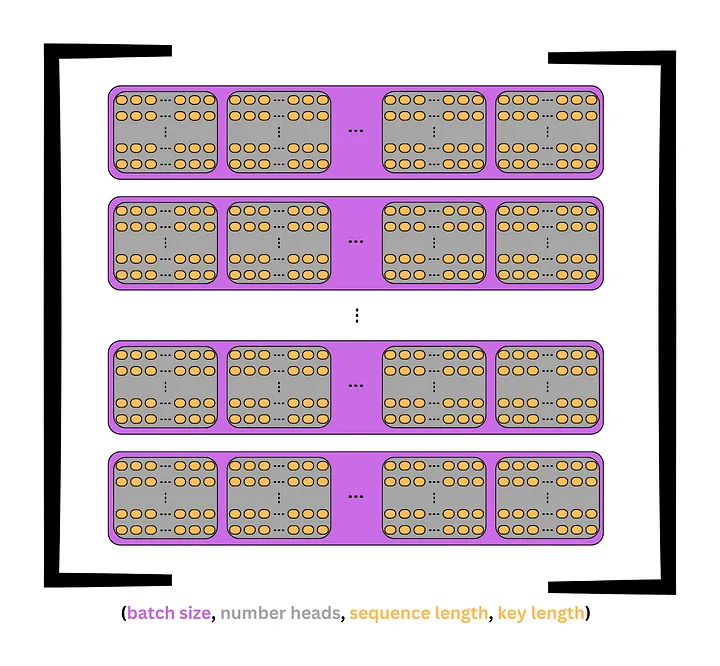


To return to the previous example, the Q tensor would be transposed from (3, 6, 4, 2) to (3, 4, 6, 2). This tensor would now represent 3 sequences, with each split across n_heads = 4, with each head containing seq_length = 6 tokens, each with a d_key = 2 element key.

Essentially, each head contains a copy of each sequence’s tokens, but it only has a d_key = 2 element representation instead of the full d_model = 8 element representation. This means each sequence is represented in n_head = 4 different subspaces simultaneously.

The code below uses permute to switch the second and third axes for each tensor.

In [81]:
# query tensor | (3, 6, 4, 2) -> (3, 4, 6, 2)
Q = Q.permute(0, 2, 1, 3)
# key tensor | (3, 6, 4, 2) -> (3, 4, 6, 2)
K = K.permute(0, 2, 1, 3)
# value tensor | (3, 6, 4, 2) -> (3, 4, 6, 2)
V = V.permute(0, 2, 1, 3)

Q

tensor([[[[ 0.43,  2.00],
          [-0.76,  2.17],
          [-2.03, -3.99],
          [ 4.01,  1.04],
          [-1.38, -0.08],
          [ 0.84,  0.85]],

         [[ 0.92,  0.61],
          [ 1.60, -2.89],
          [ 0.01, -2.23],
          [-0.32,  0.97],
          [-0.97, -1.05],
          [-0.69,  1.19]],

         [[-2.51,  1.20],
          [-2.09,  2.05],
          [ 0.31, -1.60],
          [ 3.47,  0.91],
          [-2.22, -0.18],
          [ 0.36,  0.78]],

         [[-1.33, -0.12],
          [-0.89, -1.22],
          [-0.89,  1.35],
          [ 2.99,  1.66],
          [-0.56,  0.28],
          [-0.03, -0.28]]],


        [[[-1.47,  1.69],
          [-0.31,  0.84],
          [-1.71, -2.58],
          [-1.40,  4.12],
          [-3.19,  1.37],
          [ 0.72,  1.89]],

         [[-0.94,  0.16],
          [-2.85, -0.06],
          [-5.56, -1.22],
          [-1.91,  0.77],
          [-0.44, -0.36],
          [-3.84,  1.49]],

         [[-4.89,  0.79],
          [ 0.19,  3.81]

While it is nice to have the full view, it would easier to understand by examining a single sequence.

It is easy to see the four heads in this single sequence. Each head contains six rows, which are the tokens, and each row has two elements, which are the keys. This shows how the sequence is split across four subspaces to create different representations of the same sequence.

In [82]:
# select the first sequence from the Query tensor
Q[0]

tensor([[[ 0.43,  2.00],
         [-0.76,  2.17],
         [-2.03, -3.99],
         [ 4.01,  1.04],
         [-1.38, -0.08],
         [ 0.84,  0.85]],

        [[ 0.92,  0.61],
         [ 1.60, -2.89],
         [ 0.01, -2.23],
         [-0.32,  0.97],
         [-0.97, -1.05],
         [-0.69,  1.19]],

        [[-2.51,  1.20],
         [-2.09,  2.05],
         [ 0.31, -1.60],
         [ 3.47,  0.91],
         [-2.22, -0.18],
         [ 0.36,  0.78]],

        [[-1.33, -0.12],
         [-0.89, -1.22],
         [-0.89,  1.35],
         [ 2.99,  1.66],
         [-0.56,  0.28],
         [-0.03, -0.28]]], grad_fn=<SelectBackward0>)

Calculating Attention

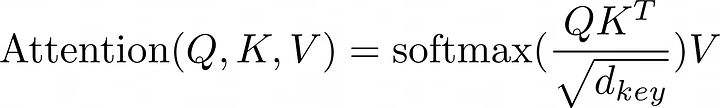

With Q, K, and V split into their heads, the scaled-dot product of Q and K can now be computed. The equation above shows that the first step is to perform tensor multiplication. However, K has to be transposed first.

Moving forward, the seq_length shape of each tensor will be known by its respective tensor for clarity, Q_length, K_length, or V_length:

Q has a shape of (batch_size, n_heads, Q_length, d_key)
K has a shape of (batch_size, n_heads, K_length, d_key)
V has a shape of (batch_size, n_heads, V_length, d_key)

The two rightmost dimensions of K must be transposed to change the shape to (batch_size, n_heads, d_key, K_length).

Now, the output of QK^T will be:

(batch_size, n_heads, Q_length, d_key) x (batch_size, n_heads, d_key, K_length) = (batch_size, n_heads, Q_length, K_length)
The corresponding sequences in each tensor will be multiplied against each other. The first sequence in Q will be multiplied with the first sequence in K, the second sequence in Q with the second sequence in K, and so on. When these sequences are multiplied against each other, each head will be multiplied against its corresponding head in the opposite tensor. The first head of the first sequence of Q will be multiplied against the first head of the first sequence of K, the second head of the first sequence of Q with the second head of the first sequence of K, and so on. While multiplying these heads, each token in Q’s head, with a shape of (Q_length, d_key), is multiplied against each token in K’s head, with a shape of (d_key, K_length). The result is a (Q_length, K_length) matrix that shows the strength of each word with every other word including itself. This is where the name “self-attention” comes from since the model finds which words are the most relevant to the sequence by multiplying it with another representation of itself.

QK^T is scaled by d_key to help make the output of the softmax function in the next step less focused around 0 and 1. Values closer to zero and one in the unscaled distribution get closer to the middle of the distribution. This can be seen in the demonstration in the appendix.

Continuing the example, the output of the scaled dot product has a shape of (3, 4, 6, 2) x (3, 4, 2, 6) = (3, 4, 6, 6).



In [83]:
# calculate scaled dot product
scaled_dot_prod = torch.matmul(Q, K.permute(0, 1, 3, 2)) / math.sqrt(d_key) # (batch_size, n_heads, Q_length, K_length)

This tensor is then passed through the softmax function to create a probability distribution. Please note how softmax is applied over each row of each matrix in each head. The softmax dimension can be set to either -1 or 3 since both indicate the rightmost dimension in the shape, which are the keys. As a reminder, for more information about softmax, see A Simple Introduction to Softmax.

In [84]:
# apply softmax to get context for each token and others
attn_probs = torch.softmax(scaled_dot_prod, dim=-1) # (batch_size, n_heads, Q_length, K_length)

With these probabilities calculated, the next step is to multiply them with the V tensor to create a summary of these distributions. The context for each word is essentially aggregated.

When this occurs, the shape of the tensor returns to normal.




In [85]:
# multiply attention and values to get reweighted values

A = torch.matmul(attn_probs, V) # (batch_size, n_heads, Q_length, d_key)

Passing It Through the Output Layer

At this point, the heads can be concatenated back together before they are passed through the final linear layer, Wo in the multi-head attention mechanism.

The concatenation reverses the split that was performed originally. The first step is to transpose n_heads and Q_length. The second step is to concatenate n_heads and d_key back together to get d_model.

Once this is complete, A will have a shape of (batch_size, Q_length, d_model).

In [86]:
# transpose from (3, 4, 6, 2) -> (3, 6, 4, 2)
A = A.permute(0, 2, 1, 3).contiguous()

# reshape from (3, 6, 4, 2) -> (3, 6, 8) = (batch_size, Q_length, d_model)
A = A.view(batch_size, -1, n_heads*d_key)

A

tensor([[[-0.66, -0.18, -1.18, -0.10,  0.35, -0.42,  0.10,  0.71],
         [-1.41, -0.62, -1.88,  0.56,  0.42, -0.32, -0.10,  1.50],
         [-1.29,  2.53, -1.18,  1.14, -1.24,  1.49,  1.12, -2.04],
         [ 1.37,  1.32, -0.39,  0.74, -2.08,  2.03, -1.34, -3.02],
         [-0.92,  1.29, -0.74,  0.94,  0.13, -0.21,  0.25, -0.62],
         [ 0.11,  0.62, -0.19,  0.99, -0.90,  1.05, -0.14, -0.17]],

        [[-2.65,  0.84,  0.74,  1.18, -3.11,  2.91, -0.93, -0.21],
         [-1.86,  0.14,  1.35,  1.76, -0.27, -0.52, -1.82, -0.23],
         [-1.84, -0.63,  1.43,  1.86,  0.10, -0.32,  0.98, -0.53],
         [-2.69,  0.91,  0.93,  1.27, -0.78, -0.01, -2.56, -0.18],
         [-3.14,  1.18,  0.70,  1.21, -1.55,  0.90, -2.27, -0.20],
         [-0.92, -0.39,  1.17,  1.50, -0.54, -0.28, -0.53, -0.23]],

        [[ 0.29, -1.08,  0.35,  0.40, -1.89,  2.00, -2.29,  0.08],
         [-0.68, -1.02,  1.09,  2.59, -1.60,  2.10,  0.89, -1.75],
         [-0.30, -0.52,  1.72,  2.06,  1.01, -1.03,  0.11,

The final step is to pass A through Wo, which has a shape of (d_model, d_model). Once again, the weight tensor is broadcast across each sequence in the batch. The final output retains its shape:

image.png

In [87]:
Wo = nn.Linear(d_model, d_model)

# (3, 6, 8) x (broadcast 8, 8) = (3, 6, 8)
output = Wo(A)

# Background
The Position-Wise Feed-Forward Network (FFN) consists of two fully connected dense layers, or a multi-layer perceptron (MLP). The hidden layer, which is known as d_ffn, is generally set to a value about four times that of d_model. This is why it is sometimes known as an expand-and-contract network.

According to d2l, it is known as a “position-wise” network because it “transforms the representation at all the sequence positions using the same MLP.”

In other words, the FNN has a size of (d_model, d_ffn) in its first layer, which means it has to be broadcast across each sequence during tensor multiplication. This means each sequence is multiplied by the same weights. If identical sequences are input, the outputs will also be identical. This same logic applies to the second dense layer of size (d_ffn, d_model), which returns the tensor to its original size.

The ReLU activiation function, max(0, X), is used between the layers. Any values greater than 0 remain the same, and any values less than or equal to 0 become 0. It introduces non-linearity and helps prevent vanishing gradients.



# Basic Implementation
The following code relies on the previous modules of the transformers model. The output of the layers up to this point is (3,6,8). There are 3 sequences of 6 tokens with 8 dimensional embeddings.

In [88]:
class MultiHeadAttention(nn.Module):
  def __init__(self, d_model: int = 512, n_heads: int = 8, dropout: float = 0.1):
    """
    Args:
        d_model:      dimension of embeddings
        n_heads:      number of self attention heads
        dropout:      probability of dropout occurring
    """
    super().__init__()
    assert d_model % n_heads == 0            # ensure an even num of heads
    self.d_model = d_model                   # 512 dim
    self.n_heads = n_heads                   # 8 heads
    self.d_key = d_model // n_heads          # assume d_value equals d_key | 512/8=64

    self.Wq = nn.Linear(d_model, d_model)    # query weights
    self.Wk = nn.Linear(d_model, d_model)    # key weights
    self.Wv = nn.Linear(d_model, d_model)    # value weights
    self.Wo = nn.Linear(d_model, d_model)    # output weights

    self.dropout = nn.Dropout(p=dropout)     # initialize dropout layer

  def forward(self, query: Tensor, key: Tensor, value: Tensor, mask: Tensor = None):
      """
      Args:
        query:        query vector        (batch_size, q_length, d_model)
        key:          key vector          (batch_size, q_length, d_model)
        value:        value vector        (batch_size, q_length, d_model)
        mask:         mask for decoder

       Returns:
         output:      attention values    (batch_size, q_length, d_model)
         atten probs: softmax scores      (batch_size, n_heads, q_length, k_length)
      """
      batch_size = key.size(0)
      # calculate query, key, and value tensors
      Q = self.Wq(query)                       # (32, 10, 512) x (512, 512) = (32, 10, 512)
      K = self.Wk(key)                         # (32, 10, 512) x (512, 512) = (32, 10, 512)
      V = self.Wv(value)                       # (32, 10, 512) x (512, 512) = (32, 10, 512)

      # split each tensor into n-heads to compute attention

      # query tensor
      Q = Q.view(batch_size,                   # (32, 10, 512) -> (32, 10, 8, 64)
               -1,                             # -1 = q_length
               self.n_heads,
               self.d_key
               ).permute(0, 2, 1, 3)         # (32, 10, 8, 64) -> (32, 8, 10, 64) = (batch_size, n_heads, q_length, d_key)
      # key tensor
      K = K.view(batch_size,                   # (32, 10, 512) -> (32, 10, 8, 64)
               -1,                           # -1 = k_length
               self.n_heads,
               self.d_key
               ).permute(0, 2, 1, 3)         # (32, 10, 8, 64) -> (32, 8, 10, 64) = (batch_size, n_heads, k_length, d_key)
      # value tensor
      V = V.view(batch_size,                   # (32, 10, 512) -> (32, 10, 8, 64)
               -1,                           # -1 = v_length
               self.n_heads,
               self.d_key
               ).permute(0, 2, 1, 3)         # (32, 10, 8, 64) -> (32, 8, 10, 64) = (batch_size, n_heads, v_length, d_key)
      # computes attention
      # scaled dot product -> QK^{T}
      scaled_dot_prod = torch.matmul(Q,        # (32, 8, 10, 64) x (32, 8, 64, 10) -> (32, 8, 10, 10) = (batch_size, n_heads, q_length, k_length)
                                   K.permute(0, 1, 3, 2)
                                   ) / math.sqrt(self.d_key)      # sqrt(64)

      # fill those positions of product as (-1e10) where mask positions are 0
      if mask is not None:
        scaled_dot_prod = scaled_dot_prod.masked_fill(mask == 0, -1e10)

      # apply softmax
      attn_probs = torch.softmax(scaled_dot_prod, dim=-1)

      # multiply by values to get attention
      A = torch.matmul(self.dropout(attn_probs), V)       # (32, 8, 10, 10) x (32, 8, 10, 64) -> (32, 8, 10, 64)
                                                        # (batch_size, n_heads, q_length, k_length) x (batch_size, n_heads, v_length, d_key) -> (batch_size, n_heads, q_length, d_key)

      # reshape attention back to (32, 10, 512)
      A = A.permute(0, 2, 1, 3).contiguous()              # (32, 8, 10, 64) -> (32, 10, 8, 64)
      A = A.view(batch_size, -1, self.n_heads*self.d_key) # (32, 10, 8, 64) -> (32, 10, 8*64) -> (32, 10, 512) = (batch_size, q_length, d_model)

      # push through the final weight layer
      output = self.Wo(A)                                 # (32, 10, 512) x (512, 512) = (32, 10, 512)

      return output, attn_probs                           # return attn_probs for visualization of the score

In [89]:
torch.set_printoptions(precision=2, sci_mode=False)

# convert the sequences to integers
sequences = ["I wonder what will come next!",
             "This is a basic example paragraph.",
             "Hello what is a basic split?"]

# tokenize the sequences
tokenized_sequences = [tokenize(seq) for seq in sequences]

# index the sequences
indexed_sequences = [[stoi[word] for word in seq] for seq in tokenized_sequences]

# convert the sequences to a tensor
tensor_sequences = torch.tensor(indexed_sequences).long()

# vocab size
vocab_size = len(stoi)

# embedding dimensions
d_model = 8

# create the embeddings
lut = Embeddings(vocab_size, d_model) # look-up table (lut)

# create the positional encodings
pe = PositionalEncoding(d_model=d_model, dropout=0.1, max_length=10)

# embed the sequence
embeddings = lut(tensor_sequences)

# positionally encode the sequences
X = pe(embeddings)

# set the n_heads
n_heads = 4

# create the attention layer
attention = MultiHeadAttention(d_model, n_heads, dropout=0.1)

# pass X through the attention layer three times to create Q, K, and V
output, attn_probs = attention(X, X, X, mask=None)

output

tensor([[[-1.04, -1.11,  0.51,  0.54,  0.57,  1.01, -0.34,  0.63],
         [-1.26, -0.91, -1.21,  0.38, -0.23,  2.64, -0.81, -0.14],
         [-2.28, -1.67,  0.08,  0.60,  0.17,  1.95, -0.72,  1.23],
         [-0.02, -0.79,  0.07,  0.42,  0.54,  1.12, -0.03,  0.57],
         [ 0.75, -2.34, -0.65,  0.53,  1.89,  1.98, -0.02,  0.59],
         [-1.10,  1.29,  1.15,  0.47, -0.63, -0.64, -0.24,  0.69]],

        [[-0.08, -1.79, -0.13, -0.51,  0.46,  0.92, -0.46,  0.63],
         [-1.19, -1.01, -0.66, -0.31,  0.89, -0.07,  0.29,  0.32],
         [-0.69,  2.33, -0.30,  0.85, -2.14,  1.51, -0.61, -0.31],
         [-0.28,  1.17, -1.50,  1.49, -1.90,  2.06, -0.33, -1.02],
         [ 1.33,  1.72, -1.65,  0.97, -2.91,  1.96, -1.63, -2.42],
         [-0.33, -0.55, -0.59,  0.16, -0.72,  1.32, -1.91, -0.75]],

        [[ 0.09,  0.26, -0.26,  1.58, -1.10,  1.55, -0.89, -0.37],
         [-0.83, -1.09, -0.84, -0.93, -0.60,  1.72, -2.45,  0.09],
         [-0.20, -1.01, -0.02, -0.88,  0.91,  0.78, -0.10,

Now, this can be passed through the FFN. This will change the 8-dimensional embeddings to 32-dimensional embeddings. This is also passed through the ReLU activation function. The new shape will be (3, 6, 8) x (8, 32) → (3, 6, 32).

In [90]:
d_ffn = d_model * 4  # 32

w_1 = nn.Linear(d_model, d_ffn)  # (8, 32)
w_2 = nn.Linear(d_ffn, d_model)  # (32, 8)

ffn_1 = w_1(output).relu()
ffn_1

tensor([[[    0.32,     0.23,     0.00,     0.84,     1.08,     0.00,     0.00,
              0.00,     0.08,     0.47,     0.80,     0.03,     0.00,     0.18,
              0.04,     0.00,     0.25,     0.00,     0.00,     0.16,     0.00,
              0.06,     0.50,     0.66,     0.00,     0.18,     0.00,     0.00,
              0.00,     0.00,     0.00,     0.00],
         [    0.00,     0.00,     1.25,     0.43,     1.87,     0.90,     1.03,
              0.43,     0.00,     0.11,     1.28,     0.99,     0.00,     0.00,
              0.00,     0.00,     0.00,     0.00,     0.35,     0.00,     0.00,
              0.36,     0.05,     0.04,     0.08,     0.17,     0.00,     0.78,
              0.05,     0.00,     0.00,     0.00],
         [    0.00,     0.22,     0.36,     0.75,     2.00,     0.00,     0.23,
              0.00,     0.00,     1.03,     1.29,     0.54,     0.00,     0.00,
              0.00,     0.00,     0.00,     0.00,     0.04,     0.51,     0.00,
              0.18

In [91]:
ffn_2 = w_2(ffn_1)
ffn_2

tensor([[[-0.23,  0.11,  0.08,  0.48,  0.16,  0.10, -0.02,  0.20],
         [-0.17,  0.91,  0.28,  0.43, -0.37,  0.20,  0.08, -0.08],
         [-0.34,  0.28,  0.06,  0.73,  0.05,  0.01, -0.15,  0.30],
         [-0.24,  0.20,  0.20,  0.32,  0.13,  0.13,  0.04,  0.09],
         [-0.59,  0.48,  0.33,  0.58,  0.29,  0.32,  0.10,  0.26],
         [-0.00, -0.06,  0.20,  0.08,  0.08, -0.17,  0.13, -0.08]],

        [[-0.28,  0.28,  0.10,  0.50,  0.09,  0.17, -0.07,  0.16],
         [-0.08,  0.16,  0.04,  0.32,  0.10, -0.00,  0.11,  0.10],
         [-0.11,  0.68,  0.36,  0.22, -0.20, -0.01,  0.35, -0.13],
         [-0.15,  1.11,  0.51,  0.15, -0.41,  0.09,  0.33, -0.29],
         [-0.24,  1.45,  0.49,  0.05, -0.41,  0.04,  0.38, -0.29],
         [-0.10,  0.74,  0.12,  0.34, -0.21,  0.12,  0.05, -0.03]],

        [[-0.13,  0.72,  0.35,  0.14, -0.08, -0.01,  0.12, -0.12],
         [-0.21,  0.80,  0.06,  0.45, -0.29,  0.16,  0.01,  0.09],
         [-0.15,  0.10,  0.06,  0.39,  0.07,  0.15,  0.03,

# Background
In general, normalization is the process of transforming features to be on a comparable scale. There are numerous ways to normalize features, including the standard score and min-max feature scaling.

Min-Max Feature Scaling

Min-max feature scaling transforms values into the range [0,1]. This is also known as a unity-based normalization. It can be calculated with the following equation:

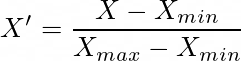

The top of the equation shifts every value by X_min; the numerator becomes 0 when X = X_min. When this is divided by the denominator, the output is 0.

Likewise, the new maximum occurs when the numerator is X_max — X_min. When this value is divided by X_max — X_min, it becomes 1. This is how the range shifts to between 0 and 1.

The example below demonstrates how the values are calculated, step by step.

In [92]:
import torch
X = torch.Tensor([22, 5, 6, 8, 10, 19,2])
X_max = X.max() # 22
X_min = X.min() # 2

# [22-2, 5-2, 6-2, 8-2, 10-2, 19-2, 2-2] =
numerator = X-X_min # [20, 3, 4, 6, 8, 17, 0]

denominator = X_max-X_min # 22 - 2 = 20


# [20/20, 3/20, 4/20, 6/20, 8/20, 17/20, 0/20]
X_new = numerator/denominator
X_new

tensor([1.00, 0.15, 0.20, 0.30, 0.40, 0.85, 0.00])

# Standard Score

During standardization, each value is converted to its standard score. The standard score is also known as the z-score. This is done by subtracting the mean from each value and dividing by the standard deviation.

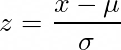

The μ represents the mean, or average, of the data. It is calculated by summing all the data points in a dataset and dividing by the number of data points, n:

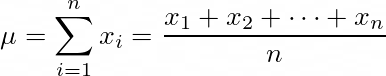

σ represents the standard deviation of the data, which is the average dispersion of the values from the mean. If a dataset has a low standard deviation, the values are likely closer to the mean. If it has a high standard deviation, this likely means the values are distributed over a larger range. It can be calculated with the following formula.

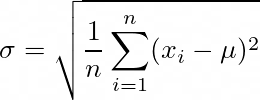

The first step is to find the deviation of each point from the mean. This is done by simply subtracting the mean from each point. These values can then be squared to remove any negatives. Finally, they can be summed and divided by the number of values, $n$. The standard deviation can then be calculated by taking the square root. If the square root is not taken, σ² is the variance.

The example below shows these steps.

import torch

In [93]:
import torch
X = torch.Tensor([22, 5, 6, 8, 10, 19,2])
n = len(X)

mean = X.sum()/n # X.mean()

std = (((X-mean)**2).sum()/n).sqrt() # X.std(unbiased=False)

z_scores = (X - mean)/std

print(mean, std, z_scores, sep="\n")

tensor(10.29)
tensor(6.90)
tensor([ 1.70, -0.77, -0.62, -0.33, -0.04,  1.26, -1.20])


# Why Normalization?
Normalization is used in machine learning because models with features on different scales take longer to train; this occurs because gradient descent will need more time to converge.

According to Pinecone, a lack of normalization can lead to large error gradients that eventually explode, making the model unstable.

In many cases, data should therefore be normalized before it is inserted into a model.

# Layer Normalization
According to Pinecone, layer normalization ensures “all neurons in a particular layer effectively have the same distribution across all features for a given input.”

Normalization is performed on the last D dimensions; D is the number of dimensions that will be normalized. For instance, if the goal is to normalize a one-dimensional vector with 10 elements, D would be 1. If the goal is to normalize a matrix with a shape of (2,3), D would be 2. Similarly, if the goal is to normalize a tensor with a shape of (2,5,3), D would be 3.

**The Normalization Equation**

For each input, notated x, layer normalization can be calculated using a modified z-score equation:

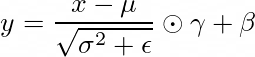

μ represents the mean of the last D dimensions
σ² represents the variance of the last D dimensions
ε is an extremely small value that helps when σ² is small
γ and β are learnable parameters.
According to Pinecone, γ and β are used because “forcing all the pre-activations to be zero and unit standard deviation…can be too restrictive. It may be the case that the fluctuant distributions are necessary for the network to learn certain classes better.”

They have the same shape as the given tensor to be normalized.
γ is initialized as ones, and β is initialized as zeros.
A Generic Example

# A Generic Example

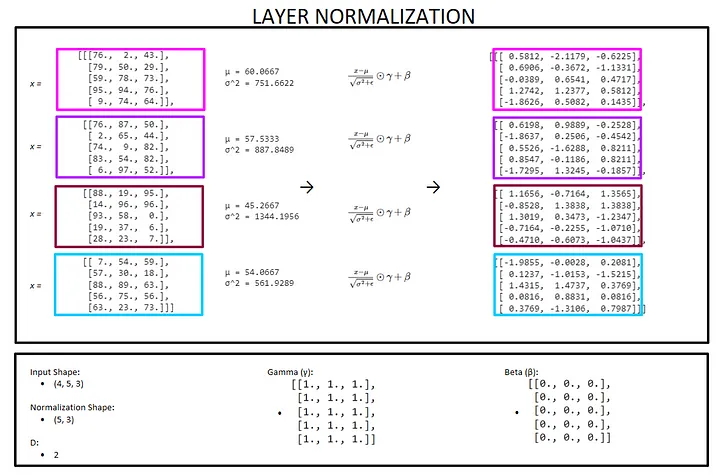

To demonstrate how layer normalization is calculated, a tensor with a shape of (4,5,3) will be normalized across its matrices, which have a size of (5,3). This means D is 2.

In the image above, it is clear that the values of each matrix are standardized based on the other values within the same matrix.

Layer normalization can be implemented using PyTorch’s statistical capabilities.

In [94]:
# Input Tensor: 4 matrices of 5 rows and 3 columns
X = torch.randint(0, 100, (4, 5, 3)).float()

# Shape to be Normalized: 5 rows, 3 columns
normalized_shape = (5, 3)

# Number of Dimensions in the Shape to be Normalized
D = len(normalized_shape)

# Set the Default Values for Epsilon, Gamma, and Beta
eps = 1e-5
gamma = torch.ones(normalized_shape)
beta = torch.zeros(normalized_shape)

X

tensor([[[34.,  1., 33.],
         [ 1., 32., 89.],
         [41., 23., 41.],
         [30., 18., 95.],
         [59., 35., 23.]],

        [[73., 97.,  4.],
         [49., 18., 71.],
         [97., 49., 86.],
         [ 1., 16., 56.],
         [24., 23., 78.]],

        [[39.,  8., 42.],
         [54., 76., 38.],
         [68., 40., 72.],
         [69., 57., 81.],
         [23., 89., 88.]],

        [[68.,  9., 82.],
         [96., 40., 87.],
         [89., 56., 39.],
         [ 3., 95.,  9.],
         [32., 87., 48.]]])

Each of these matrices can be standardized using a loop. In this loop, the mean and variance are calculated. These values are then inserted into the layer normalization equation to calculate the normalized values for the matrix.

In [95]:
# Normalize
for i in range(0,4):               # loop through each matrix
  mean = X[i].mean()               # mean
  var = X[i].var(unbiased=False)   # variance
  layer_norm = (X[i]-mean)/(torch.sqrt(var+eps))*gamma + beta

  print(f"μ = {mean:.4f}")
  print(f"σ^{2} = {var:.4f}")
  print(layer_norm)
  print("="*50)

μ = 37.0000
σ^2 = 668.8000
tensor([[-0.12, -1.39, -0.15],
        [-1.39, -0.19,  2.01],
        [ 0.15, -0.54,  0.15],
        [-0.27, -0.73,  2.24],
        [ 0.85, -0.08, -0.54]])
μ = 49.4667
σ^2 = 1040.2489
tensor([[ 0.73,  1.47, -1.41],
        [-0.01, -0.98,  0.67],
        [ 1.47, -0.01,  1.13],
        [-1.50, -1.04,  0.20],
        [-0.79, -0.82,  0.88]])
μ = 56.2667
σ^2 = 544.5956
tensor([[-0.74, -2.07, -0.61],
        [-0.10,  0.85, -0.78],
        [ 0.50, -0.70,  0.67],
        [ 0.55,  0.03,  1.06],
        [-1.43,  1.40,  1.36]])
μ = 56.0000
σ^2 = 1024.2667
tensor([[ 0.37, -1.47,  0.81],
        [ 1.25, -0.50,  0.97],
        [ 1.03,  0.00, -0.53],
        [-1.66,  1.22, -1.47],
        [-0.75,  0.97, -0.25]])


By examining the image above and the output of the code, it is apparent that layer normalization calculates a variation of the z-score for the values in each matrix in this example.

In the first matrix, the mean is about 60. It is thus reasonable that 59 would have a z-score of -0.0389. Likewise, 2, the value furthest from the mean, has a z-score of -2.1179.

The same answer as above can be calculated using PyTorch’s LayerNorm module. This module requires the shape-to-be-normalized to be initialized. Then, the tensor can be passed to the module, and each matrix will be normalized accordingly.

In [96]:
layer_normalization = nn.LayerNorm(normalized_shape) # nn.LayerNorm((5,3))
layer_normalization(X)

tensor([[[-0.12, -1.39, -0.15],
         [-1.39, -0.19,  2.01],
         [ 0.15, -0.54,  0.15],
         [-0.27, -0.73,  2.24],
         [ 0.85, -0.08, -0.54]],

        [[ 0.73,  1.47, -1.41],
         [-0.01, -0.98,  0.67],
         [ 1.47, -0.01,  1.13],
         [-1.50, -1.04,  0.20],
         [-0.79, -0.82,  0.88]],

        [[-0.74, -2.07, -0.61],
         [-0.10,  0.85, -0.78],
         [ 0.50, -0.70,  0.67],
         [ 0.55,  0.03,  1.06],
         [-1.43,  1.40,  1.36]],

        [[ 0.37, -1.47,  0.81],
         [ 1.25, -0.50,  0.97],
         [ 1.03,  0.00, -0.53],
         [-1.66,  1.22, -1.47],
         [-0.75,  0.97, -0.25]]], grad_fn=<NativeLayerNormBackward0>)

# NLP Example

In natural language processing, layer normalization occurs across the embedding dimensions of each token. For a batch with 2 sequences, 3 tokens, and 5-element embeddings, the shape is (2, 3, 5). D would be 1 since the last dimension will be normalized. The shape of the embedding will be (5,). It has to be initialized in a tuple to ensure its value can be extracted by the LayerNorm module. Alternatively, X.shape[-1] could be used.

In [97]:
# Input Tensor: 2 sequences of 3 tokens with 5 dimensional embeddings
#X = torch.randint(2, 3, 5).float()
X = torch.randint(0, 100, (2, 3, 5)).float()

# Shape to be Normalized: 5 dimensional embedding
normalized_shape = (5,)

# Number of Dimensions in the Shape to be Normalized
D = len(normalized_shape) # 1

# Create the LayerNorm
layer_normalization = nn.LayerNorm(normalized_shape)

# view the beta and gamma and beta
layer_normalization.state_dict()

OrderedDict([('weight', tensor([1., 1., 1., 1., 1.])),
             ('bias', tensor([0., 0., 0., 0., 0.]))])

In [98]:
X

tensor([[[70., 33., 93., 61., 76.],
         [83., 31., 40., 86., 89.],
         [67., 82., 99., 17., 33.]],

        [[15., 32., 38., 70., 28.],
         [ 5., 46., 26., 89., 60.],
         [96., 41., 12., 50., 64.]]])

The mean value of each row can also be calculated using PyTorch instead of a for-loop:

In [99]:
X.mean(2, keepdims=True) # maintains the dimensions of X


tensor([[[66.60],
         [65.80],
         [59.60]],

        [[36.60],
         [45.20],
         [52.60]]])

These values can be referred to after normalization is applied to see how far each value was from the mean.

In [100]:
layer_normalization(X)


tensor([[[ 0.17, -1.70,  1.33, -0.28,  0.48],
         [ 0.69, -1.39, -1.03,  0.81,  0.93],
         [ 0.24,  0.74,  1.29, -1.40, -0.87]],

        [[-1.18, -0.25,  0.08,  1.82, -0.47],
         [-1.40,  0.03, -0.67,  1.53,  0.52],
         [ 1.57, -0.42, -1.47, -0.09,  0.41]]],
       grad_fn=<NativeLayerNormBackward0>)

The Encoder is the first half of the transformer architecture, and it includes all the previous layers.

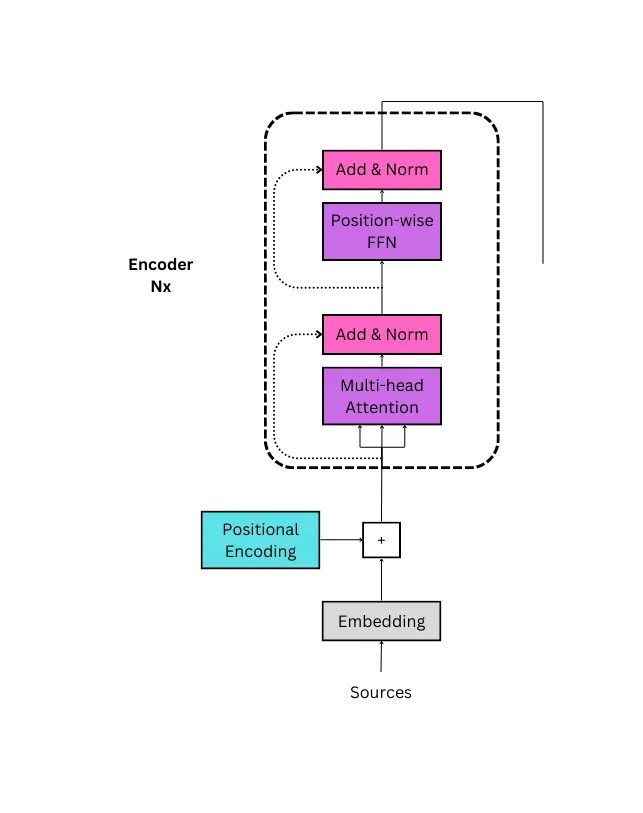



# Background
The encoder layer is a wrapper for the sublayers mentioned in the previous articles. It takes the positionally embedded sequences and passes them through the multi-head attention mechanism and the position-wise FFN. After each of these sublayers, it performs residual addition and layer normalization. According to Jindřich on Stack Exchange:

# Encoder Layer in Transformers
As mentioned above, the encoder layer is nothing more than a wrapper for the sublayers. It implements multi-head attention, a normalization layer with residual addition, a position-wise feed-forward network, and another layer normalization with residual addition.

Please note that nn.LayerNorm is used rather than the from-scratch implementation from the last article. Either is acceptable, but PyTorch’s implementation is used for simplicity.

In [101]:
class PositionwiseFeedForward(nn.Module):
    def __init__(self, d_model: int, d_ffn: int, dropout: float=0.1):
      """
      Args:
          d_model:   dimension of embeddings
          d_ffn:     dimension of feed-forward network
          dropout:   probability of droupout occuring
      """
      super().__init__()
      self.w_1 = nn.Linear(d_model, d_ffn)
      self.w_2 = nn.Linear(d_ffn, d_model)
      self.dropout = nn.Dropout(dropout)

    def forward(self, x):
       """
       Args:
           x:  output from attention (batch_size, seq_length, d_model)

       Returns:
           expanded-and-contracted representation (batch_size, seq_length, d_model)
       """
       return self.w_2(self.dropout(self.w_1(x).relu()))

In [102]:
class EncoderLayer(nn.Module):
    def __init__(self, d_model: int, n_heads: int, d_ffn: int, dropout: float):
        """
        Args:
           d_model: dimension of embeddings
           n_heads: number of heads
           d_fnn:   dimension of feed-forward network
           deopout: probability of dropout occuring
        """
        super().__init__()
        # multi-head attention sublayer
        self.attention = MultiHeadAttention(d_model, n_heads, dropout)
        # layer norm for multi-head attention
        self.atten_layer_norm = nn.LayerNorm(d_model)

        # position-wise feed-forward network
        self.positionwise_ffn = PositionwiseFeedForward(d_model, d_ffn, dropout)
        # layer norm for position-wise ffn
        self.positionwise_norm = nn.LayerNorm(d_model)

        self.dropout = nn.Dropout(dropout)

    def forward(self, src: Tensor, src_mask: Tensor):
       """
       Args:
          src:      positionally embedded sequences   (batch_size, seq_length, d_model)
          src_mask: mask for the sequences            (batch_size, 1, 1, seq_length)
       Returns:
          src:      sequences after self-attention    (batch_size, seq_length, d_model)

       """
       # pass embeddings through multi-head attention
       _src, atten_props = self.attention(src, src, src, src_mask)
       # residual add and norm
       src = self.atten_layer_norm(src + self.dropout(_src))
       # position-wise feed-forward network
       _src = self.positionwise_ffn(src)
       # residual add and norm
       src = self.positionwise_norm(src + self.dropout(_src))

       return src, atten_props



In [103]:
class Encoder(nn.Module):
   def __init__(self, d_model: int, n_heads: int, d_ffn: int, n_layers: int, dropout: float = 0.1):
      """
      Args:
         d_model:  dimension of embeddings
         n_heads:  number of heads
         d_ffn:    dimension of feed-forward network
         n_layers: number of layers
         dropout:  probability of dropout occuring

      """
      super().__init__()
      # create n_layers encoders
      self.layers = nn.ModuleList([EncoderLayer(d_model, n_heads, d_ffn, dropout)
                                  for layer in range(n_layers)])

      self.dropout = nn.Dropout(dropout)

   def forward(self, src: Tensor, src_mask: Tensor):
       """
       Args:
          src:      positionally embedded sequences   (batch_size, seq_length, d_model)
          src_mask: mask for the sequences            (batch_size, 1, 1, seq_length)
       Returns:
          src:      sequences after self-attention    (batch_size, seq_length, d_model)

       """
       # pass the sequences through each encoder
       for layer in self.layers:
          src, atten_props = layer(src, src_mask)

       self.atten_props =  atten_props

       return src


In [104]:
## code for testing the encoder
torch.set_printoptions(precision=2, sci_mode=False)

# convert the sequences to integers
sequences = ["I wonder what will come next!",
             "This is a basic example paragraph.",
             "Hello what is a basic split?"]

# tokenize the sequences
tokenized_sequences = [tokenize(seq) for seq in sequences]

# index the sequences
indexed_sequences = [[stoi[word] for word in seq] for seq in tokenized_sequences]

# convert the sequences to a tensor
tensor_sequences = torch.tensor(indexed_sequences).long()

# parameters
vocab_size = len(stoi)
d_model = 8
d_ffn = d_model*4 # 32
n_heads = 4
n_layers = 4
dropout = 0.1

# create the embeddings
lut = Embeddings(vocab_size, d_model) # look-up table (lut)

# create the positional encodings
pe = PositionalEncoding(d_model=d_model, dropout=0.1, max_length=10)

# embed the sequence
embeddings = lut(tensor_sequences)

# positionally encode the sequences
X = pe(embeddings)

# initialize encoder
encoder = Encoder(d_model, n_layers, n_heads,
                  d_ffn, dropout)

# pass through encoder
encoder(src=X, src_mask=None)

print(encoder)

Encoder(
  (layers): ModuleList(
    (0-31): 32 x EncoderLayer(
      (attention): MultiHeadAttention(
        (Wq): Linear(in_features=8, out_features=8, bias=True)
        (Wk): Linear(in_features=8, out_features=8, bias=True)
        (Wv): Linear(in_features=8, out_features=8, bias=True)
        (Wo): Linear(in_features=8, out_features=8, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (atten_layer_norm): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
      (positionwise_ffn): PositionwiseFeedForward(
        (w_1): Linear(in_features=8, out_features=4, bias=True)
        (w_2): Linear(in_features=4, out_features=8, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (positionwise_norm): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
  )
  (dropout): Dropout(p=0.1, inplace=False)
)


# Why Mask?
## Padding

In the example above, the src_mask is set to None. As mentioned in the third article, an optional mask can be passed through the multi-head attention layer. For the encoder, this mask is often created based on the padding of the sequences. The three sequences used in this article are all of length 6. However, it is more likely that sequences of varying lengths will be in a batch. Padding is added to sequences to ensure all the sequences in a batch have the same length. When this occurs, the model does not need to pay attention to padding tokens. A mask vector is created for each sequence to reflect the values that should be attended to.

This mask has a shape of (batch_size, 1, 1, seq_length). This is broadcast across each head’s representation of a sequence.

For example, the three sequences below have different lengths:

”What will come next?” → [21, 22, 5, 15]
”This is a basic paragraph.” → [20, 13, 0, 3, 17]
”A basic split will come next!” → [0, 3, 18, 22, 5, 15]
To be used in a tensor, they must be the same length, so padding must be added. This can be done using a simple function with pad from torch.nn.functional. It allows every input to be padded to the same length. It requires:

seq: a sequence
(0, pad_to_add): a tuple indicating the dimension to pad and by how much
value=pad_idx: a value to use for the padding, which is normally an integer
This function can be used in a for-loop to pad a batch of sequences to the same length, which can be seen below. These padded sequences can be used as input to the encoder.

In [105]:
from torch.nn.functional import pad

def pad_seq(seq: Tensor, max_length: int = 10, pad_idx: int = 0):
  pad_to_add = max_length - len(seq)  # amount of padding to add

  return pad(seq, (0, pad_to_add), value=pad_idx)

seqs = ['What will come next?',
         'This is a basic paragraph.',
         'A basic split will come next!']

# tokenize the sequences
tokenized_sequences = [tokenize(seq) for seq in seqs]

# index the sequences
indexed_sequences = [[stoi[word] for word in seq] for seq in tokenized_sequences]

# convert indexed sequences to tensors
tensor_sequences = [torch.Tensor(seq) for seq in indexed_sequences]

max_length = 8
pad_idx = len(stoi)  # 24

padded_seqs = []

for seq in tensor_sequences:  # iterate through tensor_sequences instead of seqs
  # pad each sequence
  padded_seqs.append(pad_seq(seq, max_length, pad_idx))

# create a tensor from the padded sequences
tensor_sequences = torch.stack(padded_seqs).long()
tensor_sequences

tensor([[21, 22,  5, 15, 24, 24, 24, 24],
        [20, 13,  0,  3, 17, 24, 24, 24],
        [ 0,  3, 18, 22,  5, 15, 24, 24]])

In [106]:
torch.set_printoptions(precision=2, sci_mode=False)

# parameters
vocab_size = len(stoi) + 1 # add one for the padding token
d_model = 8
d_ffn = d_model*4 # 32
n_heads = 4
n_layers = 4
dropout = 0.1

# create the embeddings
lut = Embeddings(vocab_size, d_model) # look-up table (lut)

# create the positional encodings
pe = PositionalEncoding(d_model=d_model, dropout=0.1, max_length=10)

# embed the sequence
embeddings = lut(tensor_sequences)

# positionally encode the sequences
X = pe(embeddings)

# initialize encoder
encoder = Encoder(d_model, n_layers, n_heads,
                  d_ffn, dropout)

# pass through encoder
encoder(src=X, src_mask=None)

# probabilities for sequence 0
encoder.atten_props[0]

tensor([[[0.12, 0.12, 0.14, 0.11, 0.14, 0.14, 0.11, 0.12],
         [0.12, 0.12, 0.14, 0.10, 0.14, 0.14, 0.11, 0.12],
         [0.12, 0.12, 0.14, 0.11, 0.13, 0.14, 0.11, 0.12],
         [0.13, 0.12, 0.14, 0.11, 0.14, 0.13, 0.11, 0.12],
         [0.13, 0.12, 0.15, 0.10, 0.15, 0.14, 0.10, 0.12],
         [0.12, 0.12, 0.14, 0.12, 0.13, 0.14, 0.12, 0.13],
         [0.13, 0.13, 0.14, 0.10, 0.14, 0.13, 0.11, 0.12],
         [0.13, 0.12, 0.15, 0.10, 0.15, 0.14, 0.10, 0.12]],

        [[0.12, 0.12, 0.11, 0.13, 0.14, 0.09, 0.14, 0.15],
         [0.12, 0.12, 0.11, 0.13, 0.14, 0.09, 0.14, 0.15],
         [0.12, 0.12, 0.11, 0.13, 0.13, 0.10, 0.14, 0.14],
         [0.12, 0.12, 0.10, 0.13, 0.14, 0.09, 0.14, 0.15],
         [0.12, 0.12, 0.10, 0.13, 0.14, 0.09, 0.14, 0.15],
         [0.13, 0.13, 0.11, 0.13, 0.13, 0.11, 0.13, 0.13],
         [0.12, 0.12, 0.10, 0.13, 0.15, 0.09, 0.14, 0.16],
         [0.12, 0.12, 0.10, 0.13, 0.14, 0.09, 0.14, 0.16]],

        [[0.11, 0.11, 0.14, 0.11, 0.15, 0.13, 0.11, 

In [107]:
tensor_sequences != pad_idx # pad_idx is 24 in this example


tensor([[ True,  True,  True,  True, False, False, False, False],
        [ True,  True,  True,  True,  True, False, False, False],
        [ True,  True,  True,  True,  True,  True, False, False]])

In [108]:
def make_src_mask(src: Tensor, pad_idx: int = 0):
  """
  Args:
      src:          raw sequences with padding        (batch_size, seq_length)

  Returns:
      src_mask:     mask for each sequence            (batch_size, 1, 1, seq_length)
  """
  # assign 1 to tokens that need attended to and 0 to padding tokens, then add 2 dimensions
  src_mask = (src != pad_idx).unsqueeze(1).unsqueeze(2)

  return src_mask

def pad_seq(seq: Tensor, max_length: int = 10, pad_idx: int = 0):
  """
  Args:
      seq:          raw sequence (batch_size, seq_length)
      max_length:   maximum length of a sequence
      pad_idx:      index for padding tokens

  Returns:
      padded seq:   padded sequence (batch_size, max_length)
  """
  pad_to_add = max_length - len(seq) # amount of padding to add

  return pad(seq,(0, pad_to_add), value=pad_idx,)

sequences = ['What will come next?',
             'This is a basic paragraph.',
             'A basic split will come next!']

# tokenize the sequences
tokenized_sequences = [tokenize(seq) for seq in sequences]

# index the sequences
indexed_sequences = [[stoi[word] for word in seq] for seq in tokenized_sequences]

max_length = 8
pad_idx = len(stoi)

padded_seqs = []

for seq in indexed_sequences:
  # pad each sequence
  padded_seqs.append(pad_seq(torch.Tensor(seq), max_length, pad_idx))

# create a tensor from the padded sequences
tensor_sequences = torch.stack(padded_seqs).long()

# create the source masks for the sequences
src_mask = make_src_mask(tensor_sequences, pad_idx)

torch.set_printoptions(precision=2, sci_mode=False)

# parameters
vocab_size = len(stoi) + 1 # add one for the padding token
d_model = 8
d_ffn = d_model*4 # 32
n_heads = 4
n_layers = 4
dropout = 0.1

# create the embeddings
lut = Embeddings(vocab_size, d_model) # look-up table (lut)

# create the positional encodings
pe = PositionalEncoding(d_model=d_model, dropout=0.1, max_length=10)

# embed the sequence
embeddings = lut(tensor_sequences)

# positionally encode the sequences
X = pe(embeddings)

# initialize encoder
encoder = Encoder(d_model, n_layers, n_heads,
                  d_ffn, dropout)

# pass through encoder
encoder(src=X, src_mask=src_mask)


tensor([[[-1.20,  0.68,  1.13, -0.54, -0.69,  1.78, -0.90, -0.25],
         [-1.46,  0.38,  2.01, -0.88, -0.64,  0.55, -0.29,  0.32],
         [-1.59,  0.31,  1.56,  0.32, -0.78,  1.26, -0.66, -0.42],
         [-1.67,  0.23,  1.25, -0.02, -0.67,  1.14, -1.09,  0.82],
         [-1.22,  0.81,  1.37,  0.27, -1.32,  1.06, -1.01,  0.05],
         [-1.57,  0.73,  1.66, -0.57, -0.56,  1.10, -0.60, -0.18],
         [-1.25,  0.48,  1.74,  0.11, -1.41,  0.96, -0.51, -0.11],
         [-1.30,  0.45,  1.34,  0.61, -1.66,  1.04, -0.26, -0.23]],

        [[-1.13, -0.08,  1.34,  0.32,  0.05,  1.03, -1.90,  0.38],
         [-1.03,  0.10,  1.01,  0.89, -0.63,  0.61, -1.87,  0.92],
         [-0.96,  1.77,  1.20, -0.59,  0.34, -0.09, -0.27, -1.40],
         [-1.51,  0.37,  1.44,  0.44, -0.65,  1.02, -1.34,  0.23],
         [-0.69, -0.42,  1.33,  0.27, -0.10,  1.10, -2.00,  0.52],
         [-0.48,  0.09,  1.26,  0.64, -0.81,  1.31, -1.83, -0.17],
         [-2.02,  0.46,  1.42, -0.99,  0.26,  0.79, -0.08,  

# Background
The decoder layer is a wrapper for the sublayers mentioned in the previous articles. It takes the positionally embedded target sequences and passes them through a masked multi-head attention mechanism. Masking is used to prevent the decoder from viewing the next tokens in a sequence. It forces the model to predict the next token using only the previous tokens as context. Then, it is passed through another multi-head attention mechanism; it takes the output of the encoder layers as an additional input. Finally, it is passed through the position-wise FFN. After each of these sublayers, it performs residual addition and layer normalization.



## Decoder Layer in Transformers
As mentioned above, the decoder layer is nothing more than a wrapper for the sublayers. It implements two multi-head attention sublayers and a position-wise feed-forward network, each followed by layer normalization and residual addition.

In [126]:
class DecoderLayer(nn.Module):

  def __init__(self, d_model: int, n_heads: int, d_ffn: int, dropout: float):
    """
    Args:
        d_model:      dimension of embeddings
        n_heads:      number of heads
        d_ffn:        dimension of feed-forward network
        dropout:      probability of dropout occurring
    """
    super().__init__()
    # masked multi-head attention sublayer
    self.masked_attention = MultiHeadAttention(d_model, n_heads, dropout)
    # layer norm for masked multi-head attention
    self.masked_attn_layer_norm = nn.LayerNorm(d_model)

    # multi-head attention sublayer
    self.attention = MultiHeadAttention(d_model, n_heads, dropout)
    # layer norm for multi-head attention
    self.attn_layer_norm = nn.LayerNorm(d_model)

    # position-wise feed-forward network
    self.positionwise_ffn = PositionwiseFeedForward(d_model, d_ffn, dropout)
    # layer norm for position-wise ffn
    self.ffn_layer_norm = nn.LayerNorm(d_model)

    self.dropout = nn.Dropout(dropout)

  def forward(self, trg: Tensor, src: Tensor, trg_mask: Tensor, src_mask: Tensor):
    """
    Args:
        trg:          embedded sequences                (batch_size, trg_seq_length, d_model)
        src:          embedded sequences                (batch_size, src_seq_length, d_model)
        trg_mask:     mask for the sequences            (batch_size, 1, trg_seq_length, trg_seq_length)
        src_mask:     mask for the sequences            (batch_size, 1, 1, src_seq_length)

    Returns:
        trg:          sequences after self-attention    (batch_size, trg_seq_length, d_model)
        attn_probs:   attention softmax scores
    """
    # pass trg embeddings through masked multi-head attention
    _trg, masked_attn_probs = self.masked_attention(trg, trg, trg, trg_mask)

    # residual add and norm
    trg = self.masked_attn_layer_norm(trg + self.dropout(_trg))

    # pass trg and src embeddings through multi-head attention
    _trg, attn_probs = self.attention(trg, src, src, src_mask)

    # residual add and norm
    trg = self.attn_layer_norm(trg + self.dropout(_trg))

    # position-wise feed-forward network
    _trg = self.positionwise_ffn(trg)

    # residual add and norm
    trg = self.ffn_layer_norm(trg + self.dropout(_trg))

    return trg, masked_attn_probs, attn_probs

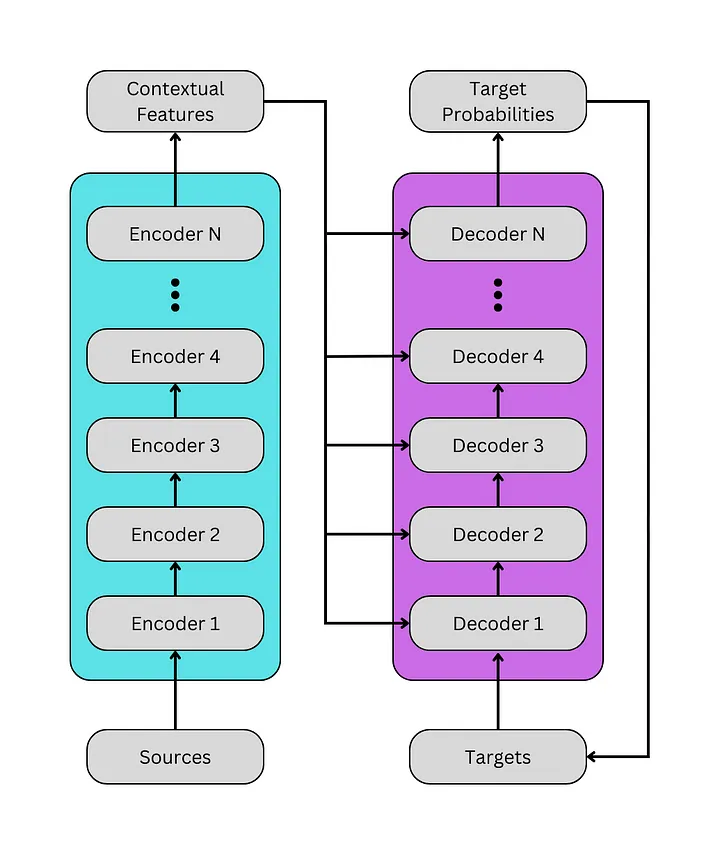

To exploit the benefits of the multi-head attention sublayers, input tokens are passed through a stack of decoder layers at a time, which can be seen in the image above. This is notated as Nx in the image at the beginning of the article.

The final linear layer is included in this module to create the logits. Logits are essentially a mock “count” of the frequency of each word in that position in a sequence given the previous words. These “counts” are passed through a softmax function to create a probability distribution that indicates the likelihood of each token in the sequence. The highest “count” will have the highest probability. This is done by projecting d_model to vocab_size. The output will have a shape of (batch_size, seq_length, vocab_size). Like before, the linear layer will be broadcast across each sequence.

In [127]:
class Decoder(nn.Module):
    def __init__(self, d_model: int, vocab_size: int,  n_heads: int, d_ffn: int, n_layers: int, dropout: float = 0.1):
      """
      Args:
         d_model:    dimension of embeddings
         vocab_size: size of the vocabulary
         n_heads:    number of heads
         d_ffn:      dimension of feed-forward network
         n_layers:   number of layers
         dropout:    probability of dropout occuring

      """
      super().__init__()
      # create n_layers encoders
      self.layers = nn.ModuleList([DecoderLayer(d_model, n_heads, d_ffn, dropout)
                                  for layer in range(n_layers)])

      self.dropout = nn.Dropout(dropout)

      # set output layer
      self.Wo = nn.Linear(d_model, vocab_size)

    def forward(self, trg: Tensor, src: Tensor, trg_mask: Tensor, src_mask: Tensor):
       """
       Args:
          trg:               mbedded sequences                 (batch_size, trg_seq_length, d_model)
          src:               embedded sequences                (batch_size, src_seq_length, d_model)
          trg_mask:          mask for te sequences             (batch_size, 1, 1, seq_length)
          src_mask:          mask for the sequences            (batch_size, 1, 1, seq_length)
       Returns:
          trg:               sequences after self-attention    (batch_size, trg_seq_length, d_model)
          atten_props:       attention softmax scores
          masked_attn_props: masked attention softmax scores


       """
       # pass the sequences through each encoder
       for layer in self.layers:
          trg, masked_atten_props, atten_props = layer(trg, src, trg_mask, src_mask)

       self.masked_atten_props = masked_atten_props
       self.atten_props =  atten_props

       return self.Wo(trg)

PyTorch’s torch.tril can be used to create the subsequent mask. It will have the shape of (trg_seq_length, trg_seq_length).



In [128]:
trg_seq_length = 10

subsequent_mask = torch.tril(torch.ones((seq_length, seq_length))).int()
subsequent_mask

tensor([[1, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0],
        [1, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 1]], dtype=torch.int32)

For each token in the sequence, the probability distribution will only be able to consider the previous tokens. However, since the target sequences must also be padded, the padding mask and subsequent mask have to be combined.



In [129]:
pad_mask = torch.Tensor([[1,1,1,1,1,1,1,0,0,0]]).unsqueeze(1).unsqueeze(2).int()
pad_mask

tensor([[[[1, 1, 1, 1, 1, 1, 1, 0, 0, 0]]]], dtype=torch.int32)

# Training a Simple Model
Before building the model, German and English vocabularies and sequences must be created. The functions in the appendix are based on those from the encoder article, but they are generalized for English and German.

This model uses the same English example as the previous articles, and a German equivalent was generated using Google Translate.

In [130]:
de_example = "Hallo! Dies ist ein Beispiel für einen Absatz, der in seine Grundkomponenten aufgeteilt wurde. Ich frage mich, was als nächstes kommt! Irgendwelche Ideen?"
en_example = "Hello! This is an example of a paragraph that has been split into its basic components. I wonder what will come next! Any guesses?"

# build the vocab
de_stoi = build_vocab(de_example)
en_stoi = build_vocab(en_example)

# build integer-to-string decoder for the vocab
de_itos = {v:k for k,v in de_stoi.items()}
en_itos = {v:k for k,v in en_stoi.items()}
en_itos

{0: 'a',
 1: 'an',
 2: 'any',
 3: 'basic',
 4: 'been',
 5: 'come',
 6: 'components',
 7: 'example',
 8: 'guesses',
 9: 'has',
 10: 'hello',
 11: 'i',
 12: 'into',
 13: 'is',
 14: 'its',
 15: 'next',
 16: 'of',
 17: 'paragraph',
 18: 'split',
 19: 'that',
 20: 'this',
 21: 'what',
 22: 'will',
 23: 'wonder'}

Three German-English pairs can be created to facilitate the forward pass. These have to be tokenized, indexed based on the vocabulary, and padded.



-------------------------------------------------------


In [131]:
def sentence_to_indexes(vocab, sentence):
    """
    Converts a sentence (string) into a list of indices.
    """
    return [vocab[word] for word in sentence]

def tokenize(sequence):
    # remove punctuation
    for punc in ["!", ".", "?"]:
        sequence = sequence.replace(punc, "")

    # split the sequence on spaces and lowercase each token
    return [token.lower() for token in sequence.split(" ")]

de_sequences = ["Hallo! Dies ist ein Beispiel für einen Absatz, der in seine Grundkomponenten aufgeteilt wurde. Ich frage mich, was als nächstes kommt! Irgendwelche Ideen?"]
en_sequences = ["Hello! This is an example of a paragraph that has been split into its basic components. I wonder what will come next! Any guesses?"]

# Tokenize the sentences
de_tokenized_sequences = [tokenize(s) for s in de_sequences]
en_tokenized_sequences = [tokenize(s) for s in en_sequences]

# Convert sentences to sequences of integers
de_indexed_sequences = [sentence_to_indexes(de_stoi, s) for s in de_tokenized_sequences]
en_indexed_sequences = [sentence_to_indexes(en_stoi, s) for s in en_tokenized_sequences]

# Add '<pad>' to the dictionaries
de_stoi['<pad>'] = len(de_stoi)
en_stoi['<pad>'] = len(en_stoi)

# pad the sequences
max_length = 9
pad_idx = de_stoi['<pad>']

de_padded_seqs = []
en_padded_seqs = []

# pad each sequence
for de_seq, en_seq in zip(de_indexed_sequences, en_indexed_sequences):
    de_padded_seqs.append(pad_seq(torch.Tensor(de_seq), max_length, pad_idx))
    en_padded_seqs.append(pad_seq(torch.Tensor(en_seq), max_length, pad_idx))

# create a tensor from the padded sequences
de_tensor_sequences = torch.stack(de_padded_seqs).long()
en_tensor_sequences = torch.stack(en_padded_seqs).long()

In [132]:
def make_trg_mask(trg: Tensor, pad_idx: int = 0):
  """
  Args:
     trg:        raw sequences with padding    (batch_size, seq_length)

  Returns:
     trg_mask:   mask for each sequence        (batch_size, 1, seq_length, seq_length)
  """
  seq_length = trg.shape[1]

  # assign True to tokens that need attended to and False to padding tokens, then add 2 dimensions
  trg_mask = (trg != pad_idx).unsqueeze(1).unsqueeze(2)

  # generate subsequent mask
  trg_sub_mask = torch.tril(torch.ones((seq_length, seq_length))).bool()

  # bitwise "and" operator | 0 & 0 = 0, 1 & 1 = 1, 1 & 0 = 0
  trg_mask = trg_mask & trg_sub_mask

  return trg_mask

In [133]:
# remove last token
trg = en_tensor_sequences[:,:-1]

# remove the first token
expected_output = en_tensor_sequences[:,1:]

# generate masks
src_mask = make_src_mask(de_tensor_sequences, pad_idx)
trg_mask = make_trg_mask(trg, pad_idx)

From here, the model can be created. The source embeddings, target embeddings, positional encodings, encoder, and decoder have to be initialized. nn.Sequential can be used with the source and target embeddings and the positional encodings to create a forward pass through both.



In [134]:
# parameters
de_vocab_size = len(de_stoi)
en_vocab_size = len(en_stoi)
d_model = 32
n_heads = 4
d_ffn = d_model * 4
n_layers = 3
dropout = 0.1
max_pe_length = 10

# create the embeddings
de_lut = Embeddings(de_vocab_size, d_model)
en_lut = Embeddings(en_vocab_size, d_model)

# create the positional encodings
pe = PositionalEncoding(d_model=d_model, dropout=0.1, max_length=max_pe_length)

# embed and encode
de_embedded = nn.Sequential(de_lut, pe)
en_embedded = nn.Sequential(en_lut, pe)

# initialize encoder
encoder = Encoder(d_model, n_heads, d_ffn, n_layers, dropout)

# initialize the decoder
decoder = Decoder(d_model, en_vocab_size, n_heads, d_ffn, n_layers, dropout)


In [135]:
# initialize the model
model = nn.ModuleList([de_embedded, en_embedded, encoder, decoder])

# normalize the weights
for p in model.parameters():
  if p.dim() > 1:
    nn.init.xavier_uniform_(p)

The total number of parameters can be previewed with a simple function.



In [140]:
def count_parameters(model):
  return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'the model has {count_parameters(model):,} trainable parameters.')

the model has 91,481 trainable parameters.


Now, a simple forward pass can be completed on the model, and the predictions can be previewed by taking the argmax of the logits.



In [143]:
# pass through encoder
encoded_embeddings = encoder(src=de_embedded(de_tensor_sequences),
                             src_mask=src_mask)

# logits for each output
logits = decoder(trg=en_embedded(trg), src=encoded_embeddings,
                 trg_mask=trg_mask,
                 src_mask=src_mask)

predictions = [[en_itos[tok] for tok in seq] for seq in logits.argmax(-1).tolist()]

Without training, the output is useless, but this illustrates a basic forward pass. Now, the model can be trained to generate the expected outputs. The hyperparameters, optimizer, and loss function must be chosen. Adam will be the optimizer, and Cross Entropy Loss will be used to assess the loss of the model. The loss function takes the logits, converts them to probabilities with softmax, and compares the argmax of them to the expected output.



In [144]:
# hyperparameters
LEARNING_RATE = 0.005
EPOCHS = 50

# adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = LEARNING_RATE)

# loss function
criterion = nn.CrossEntropyLoss(ignore_index= en_stoi["<pad>"])

A training loop can be created to update the parameters, and the predictions can be previewed on each iteration since only three sequences are used. Note that torch.nn.utils.clip_grad_norm_(model.parameters(), 1) is used to prevent exploding gradients.

In [139]:
# set the model to training mode
model.train()

# loop through each epoch
for i in range(EPOCHS):
  epoch_loss = 0

  # zero the gradients
  optimizer.zero_grad()

  # pass through encoder
  encoded_embeddings = encoder(src=de_embedded(de_tensor_sequences),
                               src_mask=src_mask)

  # logits for each output
  logits = decoder(trg=en_embedded(trg), src=encoded_embeddings,
                   trg_mask=trg_mask,
                   src_mask=src_mask)

  # calculate the loss
  loss = criterion(logits.contiguous().view(-1, logits.shape[-1]),
                   expected_output.contiguous().view(-1))

  # backpropagation
  loss.backward()

  # clip the weights
  torch.nn.utils.clip_grad_norm_(model.parameters(), 1)

  # update the weights
  optimizer.step()

  # preview the predictions
  predictions = [[en_itos[tok] for tok in seq] for seq in logits.argmax(-1).tolist()]

  if i % 7 == 0:
    print("="*25)
    print(f"epoch: {i}")
    print(f"loss: {loss.item()}")
    print(f"predictions: {predictions}")

epoch: 0
loss: 3.592050552368164
predictions: [['come', 'come', 'basic', 'come', 'any', 'basic', 'basic', 'has']]
epoch: 7
loss: 1.9639970064163208
predictions: [['is', 'a', 'paragraph', 'of', 'of', 'a', 'paragraph', 'of']]
epoch: 14
loss: 0.9404550194740295
predictions: [['this', 'this', 'an', 'example', 'of', 'a', 'paragraph', 'that']]
epoch: 21
loss: 0.3072760999202728
predictions: [['this', 'is', 'an', 'example', 'of', 'a', 'paragraph', 'that']]
epoch: 28
loss: 0.19140762090682983
predictions: [['this', 'is', 'an', 'example', 'of', 'a', 'paragraph', 'that']]
epoch: 35
loss: 0.11630231142044067
predictions: [['this', 'is', 'an', 'example', 'of', 'a', 'paragraph', 'that']]
epoch: 42
loss: 0.03210659325122833
predictions: [['this', 'is', 'an', 'example', 'of', 'a', 'paragraph', 'that']]
epoch: 49
loss: 0.1309889853000641
predictions: [['this', 'is', 'an', 'example', 'of', 'a', 'paragraph', 'a']]
